In [1]:
INPUT_DIR = './example_data/titanic/'

In [2]:
!ls -lah {INPUT_DIR}

total 184
drwxr-xr-x  5 aandrei  admin   160B Jan  5 12:00 .
drwxr-xr-x  3 aandrei  admin    96B Jan  5 12:01 ..
-rw-r--r--@ 1 aandrei  admin   3.2K Jan  5 12:00 gender_submission.csv
-rw-r--r--@ 1 aandrei  admin    28K Jan  5 12:00 test.csv
-rw-r--r--@ 1 aandrei  admin    60K Jan  5 12:00 train.csv


In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from qinspect.nb import df_peek
from qinspect.common import df_types_and_stats
import etl
import eda

# sns.set()

## Peek

In [5]:
# load
df_raw = pd.read_csv(f'{INPUT_DIR}train.csv', low_memory=False)

In [6]:
# peek
df_peek(df_raw, 'df_raw')


--- DF (891, 12) df_raw:
	> TYPES & STATS:


,type,missing #,missing %,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,float64,177,19.87,714,NaN,NaN,NaN,29.6991,14.5265,0.42,20.125,28,38,80
Cabin,object,687,77.10,204,147,C23 C25 C27,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked,object,2,0.22,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,float64,0,0.00,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329
Name,object,0,0.00,891,891,"Coutts, Master. William Loch ""William""",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parch,int64,0,0.00,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6
PassengerId,int64,0,0.00,891,NaN,NaN,NaN,446,257.354,1,223.5,446,668.5,891
Pclass,int64,0,0.00,891,NaN,NaN,NaN,2.30864,0.836071,1,2,3,3,3
Sex,object,0,0.00,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SibSp,int64,0,0.00,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8



	> DATA:


,0,1,...,889,890
PassengerId,1,2,...,890,891
Survived,0,1,...,1,0
Pclass,3,1,...,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...",...,"Behr, Mr. Karl Howell","Dooley, Mr. Patrick"
Sex,male,female,...,male,male
Age,22,38,...,26,32
SibSp,1,1,...,0,0
Parch,0,0,...,0,0
Ticket,A/5 21171,PC 17599,...,111369,370376
Fare,7.25,71.2833,...,30,7.75


## ETL

In [7]:
df = df_raw.copy()

### convert_cats

In [8]:
etl.convert_cats(df, extra_cats={'Pclass'})
df.dtypes

PassengerId       int64
Survived          int64
Pclass         category
Name           category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket         category
Fare            float64
Cabin          category
Embarked       category
dtype: object

### fill_missing

In [9]:
etl.fill_missing(df, how='median')
df_types_and_stats(df)

,type,missing #,missing %,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,float64,0,0.00,891,NaN,NaN,NaN,29.3616,13.0197,0.42,22,28,35,80
Cabin,category,687,77.10,204,147,B96 B98,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked,category,2,0.22,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,float64,0,0.00,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329
Name,category,0,0.00,891,891,"van Melkebeke, Mr. Philemon",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parch,int64,0,0.00,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6
PassengerId,int64,0,0.00,891,NaN,NaN,NaN,446,257.354,1,223.5,446,668.5,891
Pclass,category,0,0.00,891,3,3,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,category,0,0.00,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SibSp,int64,0,0.00,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8


### numericalize

In [10]:
etl.numericalize(df)
df.dtypes

PassengerId      int64
Survived         int64
Pclass            int8
Name             int16
Sex               int8
Age            float64
SibSp            int64
Parch            int64
Ticket           int16
Fare           float64
Cabin            int16
Embarked          int8
dtype: object

### train_test_xy_split

In [11]:
x_train, x_test, y_train, y_test = etl.train_test_xy_split(
    df, ['Survived'], train_fr=0.8)

In [12]:
df[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,4,110,3,22.0,1,0,525,7.2500,1,4
1,2,1,2,192,2,38.0,1,0,598,71.2833,83,2
2,3,1,4,355,2,26.0,0,0,671,7.9250,1,4
3,4,1,2,274,2,35.0,1,0,51,53.1000,57,4
4,5,0,4,17,3,35.0,0,0,474,8.0500,1,4


In [13]:
x_train[:5]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,4,110,3,22.0,1,0,525,7.2500,1,4
1,2,2,192,2,38.0,1,0,598,71.2833,83,2
2,3,4,355,2,26.0,0,0,671,7.9250,1,4
3,4,2,274,2,35.0,1,0,51,53.1000,57,4
4,5,4,17,3,35.0,0,0,474,8.0500,1,4


In [14]:
y_train[:5]

array([0, 1, 1, 1, 0])

In [15]:
df.sample(frac=1)[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
128,129,1,4,655,2,28.0,1,1,198,22.3583,140,2
272,273,1,3,532,2,41.0,0,1,164,19.5000,1,4
85,86,1,4,54,2,33.0,3,0,249,15.8500,1,4
640,641,0,4,399,3,20.0,0,0,411,7.8542,1,4
454,455,0,4,646,3,28.0,0,0,530,8.0500,1,4


## EDA

/Users/aandrei/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


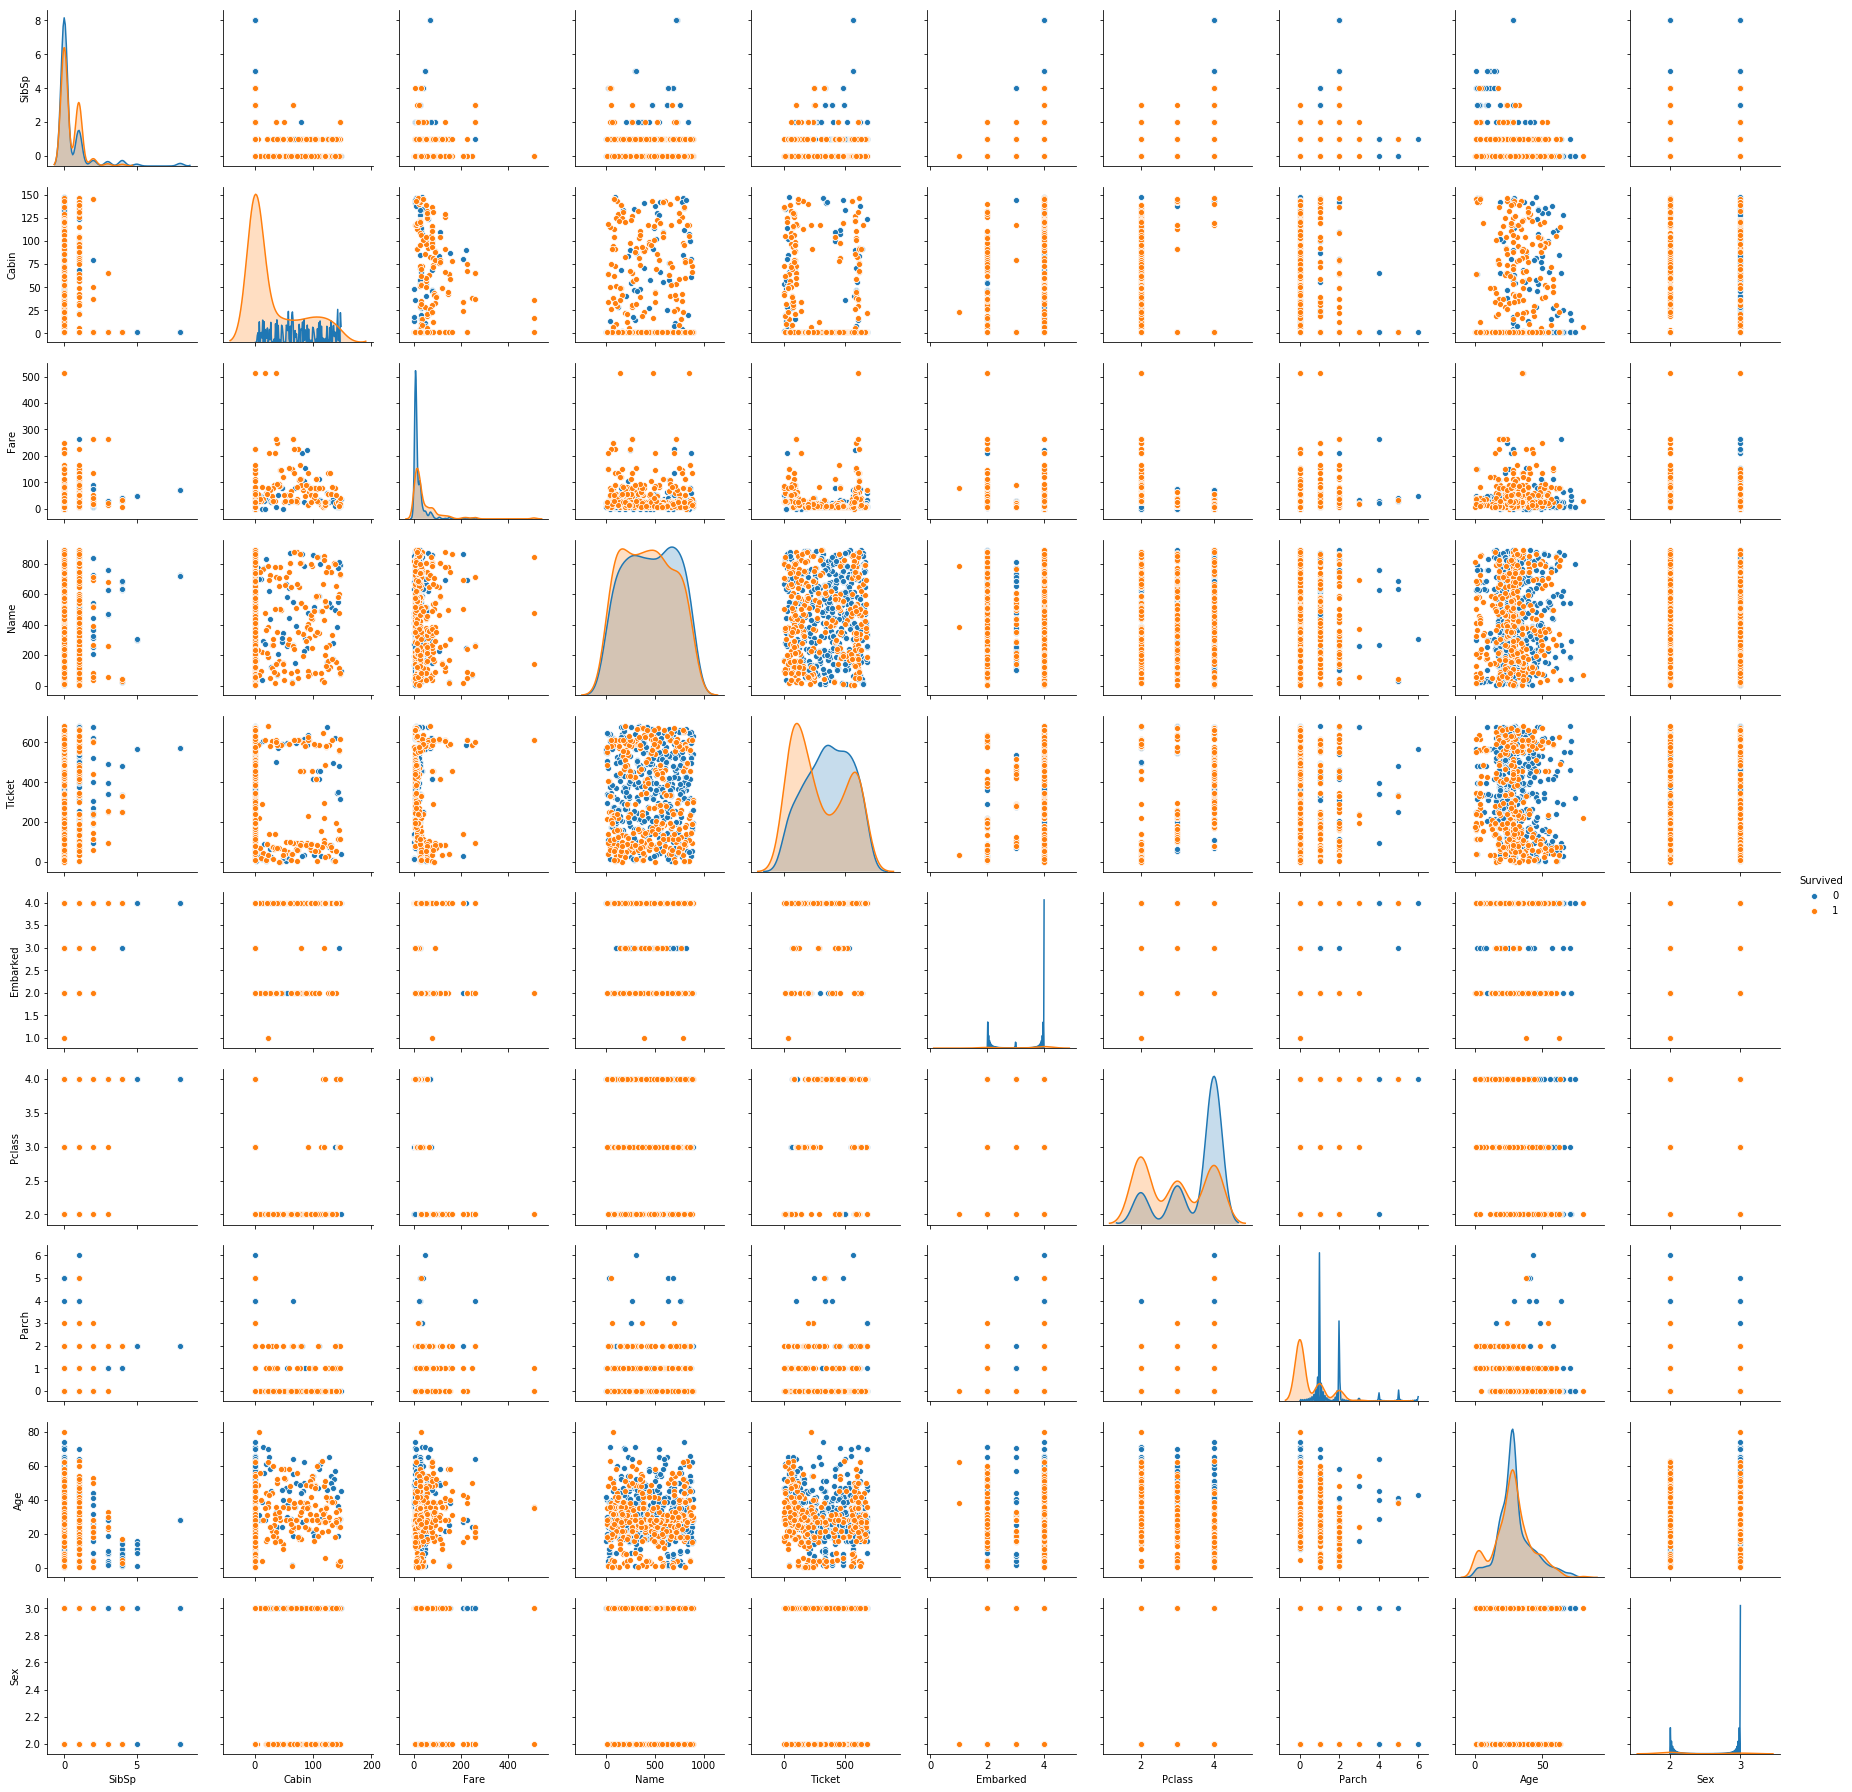

In [16]:
eda.pairs_dists_plot(df, 'Survived', except_cols={'PassengerId'});

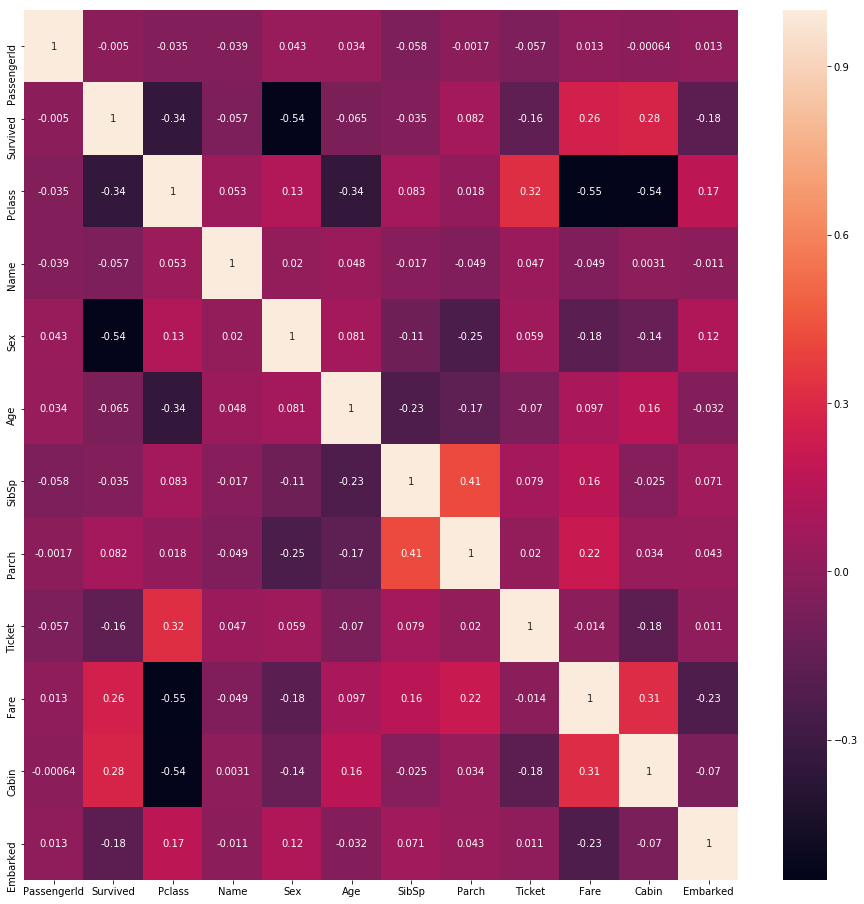

In [17]:
eda.heatmap_plot(df);

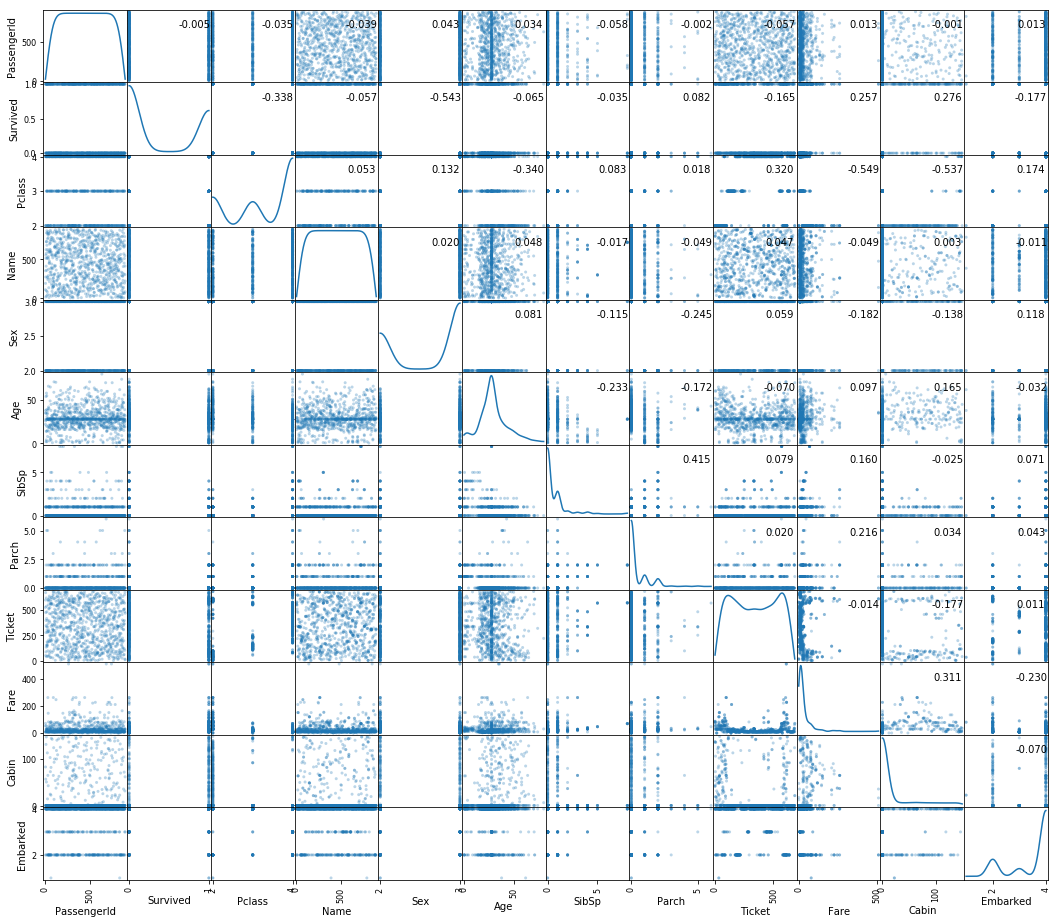

In [20]:
eda.pairs_corr_plot(df);